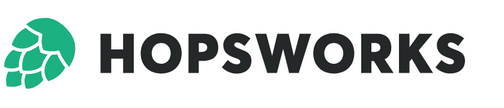

# Batch Predictions

**Note**: you may get an error when installing hopsworks on Colab, and it is safe to ignore it.

## 🗒️ This notebook is divided in 3 main sections:
1. **Read a batch of data, ready for batch inference**
2. **Download & use the model to generate predictions using the inference data**
3. **Save the UI output as a .png graph, and write the predictions to a Feature Group**

In [1]:
!pip install -U hopsworks --quiet

In [1]:
import os
os.environ['CONDA_DLL_SEARCH_MODIFICATION_ENABLE'] = '1'

In [2]:
import hopsworks
project = hopsworks.login()

fs = project.get_feature_store()
mr = project.get_model_registry()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/3192
Connected. Call `.close()` to terminate connection gracefully.
Connected. Call `.close()` to terminate connection gracefully.


In [3]:
import datetime
start_date = (datetime.datetime.now() - datetime.timedelta(hours=24)) 
end_date = (datetime.datetime.now()) 
print(start_date)
print(end_date)

2022-10-31 10:09:23.517732
2022-11-01 10:09:23.517732


In [4]:
feature_view = fs.get_feature_view("cc_trans_fraud", 1)

feature_view.init_batch_scoring(training_dataset_version=1)

In [5]:
print(feature_view.get_batch_query())

WITH right_fg0 AS (SELECT *
FROM (SELECT `fg2`.`tid` `tid`, `fg2`.`datetime` `datetime`, `fg2`.`cc_num` `join_pk_cc_num`, `fg2`.`datetime` `join_evt_datetime`, `fg0`.`cc_num` `cc_num`, `fg0`.`category` `category`, `fg0`.`amount` `amount`, `fg0`.`age_at_transaction` `age_at_transaction`, `fg0`.`days_until_card_expires` `days_until_card_expires`, `fg0`.`loc_delta_t_minus_1` `loc_delta_t_minus_1`, `fg0`.`time_delta_t_minus_1` `time_delta_t_minus_1`, RANK() OVER (PARTITION BY `fg2`.`cc_num`, `fg2`.`datetime` ORDER BY `fg0`.`datetime` DESC) pit_rank_hopsworks
FROM `frederic_featurestore`.`transactions_fraud_label_2` `fg2`
INNER JOIN `frederic_featurestore`.`cc_trans_fraud_2` `fg0` ON `fg2`.`cc_num` = `fg0`.`cc_num` AND `fg2`.`datetime` >= `fg0`.`datetime`) NA
WHERE `pit_rank_hopsworks` = 1), right_fg1 AS (SELECT *
FROM (SELECT `fg2`.`tid` `tid`, `fg2`.`datetime` `datetime`, `fg2`.`cc_num` `join_pk_cc_num`, `fg2`.`datetime` `join_evt_datetime`, `fg1`.`trans_volume_mstd` `trans_volume_mstd`, 

In [6]:
transactions_df = feature_view.get_batch_data(start_time = start_date, end_time = end_date)
transactions_df

2022-11-01 10:09:51,836 INFO: USE `frederic_featurestore`
2022-11-01 10:09:53,427 INFO: WITH right_fg0 AS (SELECT *
FROM (SELECT `fg2`.`tid` `tid`, `fg2`.`datetime` `datetime`, `fg2`.`cc_num` `join_pk_cc_num`, `fg2`.`datetime` `join_evt_datetime`, `fg0`.`cc_num` `cc_num`, `fg0`.`category` `category`, `fg0`.`amount` `amount`, `fg0`.`age_at_transaction` `age_at_transaction`, `fg0`.`days_until_card_expires` `days_until_card_expires`, `fg0`.`loc_delta_t_minus_1` `loc_delta_t_minus_1`, `fg0`.`time_delta_t_minus_1` `time_delta_t_minus_1`, RANK() OVER (PARTITION BY `fg2`.`cc_num`, `fg2`.`datetime` ORDER BY `fg0`.`datetime` DESC) pit_rank_hopsworks
FROM `frederic_featurestore`.`transactions_fraud_label_2` `fg2`
INNER JOIN `frederic_featurestore`.`cc_trans_fraud_2` `fg0` ON `fg2`.`cc_num` = `fg0`.`cc_num` AND `fg2`.`datetime` >= `fg0`.`datetime`
WHERE `fg2`.`datetime` >= 1667210963517 AND `fg2`.`datetime` <= 1667297363517) NA
WHERE `pit_rank_hopsworks` = 1), right_fg1 AS (SELECT *
FROM (SELECT 

,tid,datetime,cc_num,category,amount,age_at_transaction,days_until_card_expires,loc_delta_t_minus_1,time_delta_t_minus_1,trans_volume_mstd,trans_volume_mavg,trans_freq,loc_delta_mavg
0,928df646370729f9d945d95552649ca0,1667212254000,4003456744416606,0,0.002803,0.401648,0.244221,0.042577,0.015326,0.013200,0.013001,0.013001,0.800729
1,2c900acd60375ad2017ea376a31373b1,1667217923000,4003456744416606,7,0.044406,0.533435,0.882031,0.148687,0.000414,0.000000,NaN,NaN,NaN
2,3060ba2685f7a6ad38b19c1a74327490,1667218599000,4003456744416606,4,0.002185,0.533435,0.882027,0.114631,0.000871,0.000000,NaN,NaN,NaN
3,d567a79ba09496a9d78474cf9fe72072,1667220023000,4003456744416606,4,0.002830,0.533436,0.882019,0.107512,0.000949,0.000000,NaN,NaN,NaN
4,ae52125bfa8e2dcae279f0829edc88cc,1667221574000,4003456744416606,1,0.000553,0.533436,0.882010,0.146863,0.000144,0.039554,0.039360,0.039360,0.800729
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55237,525ab50e550ea7af479fdefeb54aad04,1667288312000,4999763787658689,1,0.001028,0.587482,0.808487,0.037927,0.001760,0.004337,0.004135,0.004135,1.000000
55238,9cd5ec4e72b0dfd2db6dd1c5611f0a14,1667291189000,4999763787658689,1,0.000458,0.587483,0.808471,0.065012,0.000955,0.002504,0.002302,0.002302,1.000000
55239,6180d7c8e9652582f027419413f754d7,1667292750000,4999763787658689,3,0.003189,0.587483,0.808462,0.054200,0.000649,0.003743,0.003542,0.003542,1.000000
55240,4f2868fff042f30a5e4499c9ac0cd4a0,1667293810000,4999763787658689,5,0.026061,0.587484,0.808456,0.000000,0.000000,0.024328,0.024131,0.024131,1.000000


In [7]:
features_df = transactions_df.iloc[: , 3:]
features_df

,category,amount,age_at_transaction,days_until_card_expires,loc_delta_t_minus_1,time_delta_t_minus_1,trans_volume_mstd,trans_volume_mavg,trans_freq,loc_delta_mavg
0,0,0.002803,0.401648,0.244221,0.042577,0.015326,0.013200,0.013001,0.013001,0.800729
1,7,0.044406,0.533435,0.882031,0.148687,0.000414,0.000000,NaN,NaN,NaN
2,4,0.002185,0.533435,0.882027,0.114631,0.000871,0.000000,NaN,NaN,NaN
3,4,0.002830,0.533436,0.882019,0.107512,0.000949,0.000000,NaN,NaN,NaN
4,1,0.000553,0.533436,0.882010,0.146863,0.000144,0.039554,0.039360,0.039360,0.800729
...,...,...,...,...,...,...,...,...,...,...
55237,1,0.001028,0.587482,0.808487,0.037927,0.001760,0.004337,0.004135,0.004135,1.000000
55238,1,0.000458,0.587483,0.808471,0.065012,0.000955,0.002504,0.002302,0.002302,1.000000
55239,3,0.003189,0.587483,0.808462,0.054200,0.000649,0.003743,0.003542,0.003542,1.000000
55240,5,0.026061,0.587484,0.808456,0.000000,0.000000,0.024328,0.024131,0.024131,1.000000


In [8]:
import joblib

the_model = mr.get_model("cc_fraud", version=1)
model_dir = the_model.download()

model = joblib.load(model_dir + "/cc_fraud_model.pkl")

## <span style="color:#ff5f27;">  Use the model to score transactions </span>

In [9]:
predictions = model.predict(features_df)

In [10]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
transactions_df['prediction'] = predictions.tolist()

In [12]:
results_df = transactions_df.copy()[["tid", "cc_num", "datetime", "prediction"]]

In [13]:
results_df.loc[:,'batch_start_date'] = start_date
results_df

,tid,cc_num,datetime,prediction,batch_start_date
0,928df646370729f9d945d95552649ca0,4003456744416606,1667212254000,0,2022-10-31 10:09:23.517732
1,2c900acd60375ad2017ea376a31373b1,4003456744416606,1667217923000,0,2022-10-31 10:09:23.517732
2,3060ba2685f7a6ad38b19c1a74327490,4003456744416606,1667218599000,0,2022-10-31 10:09:23.517732
3,d567a79ba09496a9d78474cf9fe72072,4003456744416606,1667220023000,0,2022-10-31 10:09:23.517732
4,ae52125bfa8e2dcae279f0829edc88cc,4003456744416606,1667221574000,0,2022-10-31 10:09:23.517732
...,...,...,...,...,...
55237,525ab50e550ea7af479fdefeb54aad04,4999763787658689,1667288312000,0,2022-10-31 10:09:23.517732
55238,9cd5ec4e72b0dfd2db6dd1c5611f0a14,4999763787658689,1667291189000,0,2022-10-31 10:09:23.517732
55239,6180d7c8e9652582f027419413f754d7,4999763787658689,1667292750000,0,2022-10-31 10:09:23.517732
55240,4f2868fff042f30a5e4499c9ac0cd4a0,4999763787658689,1667293810000,0,2022-10-31 10:09:23.517732


In [14]:
results_fg = fs.get_or_create_feature_group(
    name="cc_fraud_results",
    version=1,
    description="Number of predicted frauds by card",
    primary_key=["cc_num"],
    event_time="datetime"
)
results_fg.insert(results_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/3192/fs/3140/fg/3735


Uploading Dataframe: 0.00% |          | Rows 0/55242 | Elapsed Time: 00:00 | Remaining Time: ?

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/3192/jobs/named/cc_fraud_results_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x28563b76fd0>, None)

In [15]:
results_df.loc[:,'batch_end_date'] = end_date
results_df

,tid,cc_num,datetime,prediction,batch_start_date,batch_end_date
0,928df646370729f9d945d95552649ca0,4003456744416606,1667212254000,0,2022-10-31 10:09:23.517732,2022-11-01 10:09:23.517732
1,2c900acd60375ad2017ea376a31373b1,4003456744416606,1667217923000,0,2022-10-31 10:09:23.517732,2022-11-01 10:09:23.517732
2,3060ba2685f7a6ad38b19c1a74327490,4003456744416606,1667218599000,0,2022-10-31 10:09:23.517732,2022-11-01 10:09:23.517732
3,d567a79ba09496a9d78474cf9fe72072,4003456744416606,1667220023000,0,2022-10-31 10:09:23.517732,2022-11-01 10:09:23.517732
4,ae52125bfa8e2dcae279f0829edc88cc,4003456744416606,1667221574000,0,2022-10-31 10:09:23.517732,2022-11-01 10:09:23.517732
...,...,...,...,...,...,...
55237,525ab50e550ea7af479fdefeb54aad04,4999763787658689,1667288312000,0,2022-10-31 10:09:23.517732,2022-11-01 10:09:23.517732
55238,9cd5ec4e72b0dfd2db6dd1c5611f0a14,4999763787658689,1667291189000,0,2022-10-31 10:09:23.517732,2022-11-01 10:09:23.517732
55239,6180d7c8e9652582f027419413f754d7,4999763787658689,1667292750000,0,2022-10-31 10:09:23.517732,2022-11-01 10:09:23.517732
55240,4f2868fff042f30a5e4499c9ac0cd4a0,4999763787658689,1667293810000,0,2022-10-31 10:09:23.517732,2022-11-01 10:09:23.517732


In [16]:
import numpy as np
unique, counts = np.unique(predictions, return_counts=True)

In [17]:
print(np.asarray((unique, counts)).T)

[[    0 55144]
 [    1    98]]


In [18]:
print(counts[1])

98


In [19]:
import pandas as pd
data = {'datetime': [start_date], 'num_predicted_fraud': [counts[1]]}
df = pd.DataFrame.from_dict(data)

### Write the number of predicted credit card frauds to a Feature Group


In [20]:
fraud_fg = fs.get_or_create_feature_group(
    name="predicted_fraud",
    version=1,
    description="Number of predicted frauds by day",
    primary_key=["datetime"],
    event_time="datetime"
)
fraud_fg.insert(df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/3192/fs/3140/fg/3736


Uploading Dataframe: 0.00% |          | Rows 0/1 | Elapsed Time: 00:00 | Remaining Time: ?

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/3192/jobs/named/predicted_fraud_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x28563b79970>, None)

### Create a graph of the numer of suspected fraudulent transactions over time

First, read up all the historical suspected fraudulent transactions 

In [21]:
history_df = fraud_fg.read()

2022-11-01 10:16:19,615 INFO: USE `frederic_featurestore`
2022-11-01 10:16:21,821 INFO: SELECT `fg0`.`datetime` `datetime`, `fg0`.`num_predicted_fraud` `num_predicted_fraud`
FROM `frederic_featurestore`.`predicted_fraud_1` `fg0`


In [22]:
# Sort the historical fraud predictions by day
history_df = history_df.sort_values(by = ['datetime'])  

In [23]:
history_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             1 non-null      datetime64[ns]
 1   num_predicted_fraud  1 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 24.0 bytes


In [24]:
history_df['day_of_year'] = history_df['datetime'].dt.dayofyear 

history_df

,datetime,num_predicted_fraud,day_of_year
0,2022-10-31 10:09:23.517,98,304


<Figure size 1080x504 with 0 Axes>

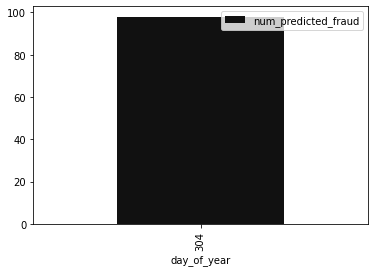

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

color='#111111'
plt.figure(figsize=(15, 7))

history_df.plot(kind='bar', x='day_of_year', y='num_predicted_fraud', color=color)

plt.savefig("fraud_counts.png")
plt.show()

plt.close()
